# FINAL PROJECT 1: LINEAR REGRESSION

<p style = "font-size: 48px"><b>UBER VS LYFT</b></p>

##A. Introduction

### Our Members:
</br>
1. Nama: Javier Al Faiza
</br>
   ID: PYTN-KS20-013
</br>
</br>
2. Nama: Leticia
</br>
ID: PYTN-KS20-023
</br>
</br>
3. Nama: Novita Nurul Hidayati
</br>
ID: PYTN-KS20-021

### Abstract

<p style='text-align: justify;'>
    Perkembangan teknologi saat ini sangat pesat, sehingga dapat mengubah gaya hidup masyarakat sebelumnya. Ini sangat memudahkan pekerjaan masyarakat dalam banyak hal, misalnya mobilitas perjalanan. Meningkatnya akses internet melalui smartphone di kalangan masyarakat dunia mengundang hadirnya transportasi online. Pada tahun 2018, New York telah menunjukkan peningkatan yang kuat dalam aktivitas bisnis, sementara juga memimpin skor global dalam human capital. Hal ini berarti, New York menjadi salah satu kota paling berpengaruh di dunia (Kearney, Global Cities Report 2018).</p>

<p style='text-align: justify;'>
Di New York, ride-hailing yang paling populer adalah Uber dan Lyft. Secara umum, tidak terdapat banyak perbedaan dari segi biaya dan waktu antara moda ride-hailing dengan taksi. Keunggulan moda ride-hailing dibandingkan dengan taksi adalah dalam aspek kenyamanan. Calon penumpang tidak harus menunggu di pinggir jalan, namun dapat menggunakan aplikasi pada smartphone untuk memanggil pengemudi. </p>
    
<p style='text-align: justify;'>
Untuk membantu masyarakat New York City dalam memilih transportasi online yang terbaik dengan harga murah berdasarkan berbagai macam pertimbangan, seperti cuaca, hari, dan jarak, maka akan dibuat sebuah Aplikasi Prediksi Harga Transportasi Online (Uber dan Lyft) di New York City dengan Menggunakan Perbandingan Metode Linear Regression dan Random Forest </p>



### Data

<p style='text-align: justify;'>
    Dataset yang digunakan yaitu <b>Uber vs Lyft Dataset New York, USA</b> yang berisi record data perjalanan taksi online Uber dan Lyft di New York, USA. Dataset ini memiliki 57 atribut, tetapi yang paling relevan ada 10 atribut dari semuanya. Dari 57 atribut, data yang diperlukan untuk proyek ini antara lain: </p>

- Cab_type: Menyatakan merk transportasi online (Uber, Lyft).
- Name: Menyatakan jenis mobil yang dipilih (Lux, Lux Black XL, Lyft, Lyft XL, UberXL, Taxi, Uberpool, Black SUV, WAV, Black, UberX, Lux Black, Shared).
- Hour: Waktu berupa pukul berapa transportasi online dipesan (24 jam).
- Day: Tanggal transportasi online dipesan.
- Month: Bulan apa saja transportasi online dipesan (bulan 11 dan 12).
- Source: Destinasi awal.
- Destination: Destinasi akhir.
- Price: Harga transportasi online (mata uang dollar US).
- Distance: Menyatakan jarak yang ditempuh (km).
- Short_summary: Cuaca ketika transportasi online dipesan (Overcast, Mostly Cloudy, Partly Cloudy, Clear, Light Rain, Rain, Possible Drizzle, Foggy, Drizzle).
- Temperature: Menyatakan suhu ketika transportasi online dipesan (Celcius).
- Visibility: Jarak penglihatan.
- Surge_multiplier: Kenaikan harga penawaran ketika terjadi lonjakan penumpang.



### Objective
Objective yang ingin dicapai dalam analisis ini, yaitu:
- Mengetahui apa saja faktor-faktor yang berpengaruh dalam memprediksi tarif harga transportasi online.
- Menemukan model terbaik untuk digunakan dalam memprediksi tarif harga transportasi online.
- Memberikan insight yang bertujuan untuk membantu penumpang dan pihak transportasi online dalam bentuk charts.

##B. Import Libraries

In [203]:
import pandas as pd
import numpy as np
import datetime
import calendar

%matplotlib inline
import matplotlib as mpl
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

import pickle
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

##C. Data Loading

###Import Dataset
</br> Import dilakukan dari Google Drive karena Tugas ini dikerjakan melalui Google Colab

In [204]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Membaca data pada file .csv dan menampilkan dataset tanpa memotong tampilan frame DataFrame pada kolomnya**

In [205]:
df = pd.read_csv('/content/drive/MyDrive/Dataset_fp1/rideshare_kaggle.csv',)
pd.set_option("display.max.columns", None)

**Menampilkan 10 data pertama**

In [206]:
df.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,lyft_lux,Lux Black,16.5,0.44,1.0,42.2148,-71.033,38.75,33.51,Overcast,Light rain in the morning and overnight.,0.0000,0.0,0.84,7.19,8.88,1545022800,8.325,40.61,1545076800,24.07,1545130800,34.97,1545080400,12.04,1545134400,cloudy,34.41,1000.46,294,1.00,1,8.325,335.8,1545048523,1545081282,0.33,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,lyft_plus,Lyft XL,10.5,1.08,1.0,4

**Menampilkan 10 data terakhir**

In [207]:
df.tail(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693061,54362c72-124b-47e8-8d07-62a07cfff624,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,15.0,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693062,64a50889-d05b-49de-b416-1802db5c27ac,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,15.0,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693063,6c1d9207-a9af-431e-a65f-3d9d205f28bf,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.61,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693064,25ed29df-4f9c-4aac-8218-681427f1d738,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,West End,North End,Uber,6c84fd89-3f11-4782-9b50-97c468b19529,Black,17.0,1.00,1.0,42.3503,-71.0810,38.19,38.19,Overcast,Light rain until evening.,0.0,0.0,0.83,2.07,3.50,1543755600,9.698,50.80,1543788000,44.97,1543816800,50.13,1543788000,45.62,1543816800,cloudy,33.58,1021.39,136,1.00,0,9.698,269.8,1543751798,1543785242,0.86,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,

### Jumlah Baris dan Kolom pada Dataset

In [208]:
x = df.shape[0]
y = df.shape[1]

print('Jumlah Baris: ', x, '\nJumlah Kolom: ', y)

Jumlah Baris:  693071 
Jumlah Kolom:  57


### Tipe Data dari Setiap Kolom Dataset

In [209]:
#Melihat informasi detail mengenai Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

###Menghitung Unique Values

In [210]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

### Melihat Statistik Data

In [211]:
## Melihat statistik data seperti count, mean, standard deviation, maximum, mininum, dan quartile
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

###Mengecek Missing Values

In [212]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

###Mengecek Data Duplikat

In [213]:
df.duplicated().sum()

0

##D. Data Cleaning

### Menghandle Missing Values

In [214]:
#Menghapus Missing Values
df_missval=df.dropna()
df_missval.head(3)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


Pada Dataset kali ini, kami memilih menggunakan metode **Drop** untuk Menghandle Missing Values. Alasan kami memilih metode ini karena atribut yang memiliki Missing Values adalah atribut **price** dimana atribut **price** merupakan target dalam pengerjaan kali ini dan jika Missing values pada atribut price di-handle dengan metode **Impute** , nilai yang dihasilkan pada proses **Impute** bisa jadi tidak akurat sehingga akan mempengaruhi keakuratan hasilnya nanti.

In [215]:
#Memeriksa kembali apakah masih ada Missing Values
df_missval.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [216]:
#Melakukan Cross Tab untuk kolom cab_type dan name
pd.crosstab(df_missval.cab_type, df_missval.name)

name,Black,Black SUV,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared,UberPool,UberX,UberXL,WAV
cab_type,,,,,,,,,,,,
Lyft,0,0,51235,51235,51235,51235,51235,51233,0,0,0,0
Uber,55095,55096,0,0,0,0,0,0,55091,55094,55096,55096


In [217]:
#Mengambil kolom-kolom yang akan digunakan dalam permodelan dan menyimpannya dalam variabel baru
col_group = [
    "cab_type",
    "name",
    "hour",
    "day",
    "month",
    "source",
    "destination",
    "price",
    "distance",
    "short_summary",
    "temperature",
    "visibility",
    "surge_multiplier"
]
df_group = df_missval[col_group]

**Keterangan:**
Dari 57 kolom yang terdapat pada dataset, maka akan diambil beberapa kolom berikut untuk digunakan dalam analisis ini:

* cab_type
* name
* hour
* day
* month
* source
* destination
* price
* distance
* short_summary
* temperature
* visibility
* surge_multiplier

In [218]:
#Menampilkan 10 data teratas
df_group.head(10)

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,visibility,surge_multiplier
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,10.000,1.0
5,Lyft,Lux Black,18,17,12,Haymarket Square,North Station,16.5,0.44,Overcast,38.75,8.325,1.0
6,Lyft,Lyft XL,5,26,11,Back Bay,Northeastern University,10.5,1.08,Overcast,41.99,4.675,1.0
7,Lyft,Lux Black,19,2,12,Back Bay,Northeastern University,16.5,1.08,Light Rain,49.88,3.052,1.0
8,Lyft,Shared,6,3,12,Back Bay,Northeastern University,3.0,1.08,Foggy,45.58,1.413,1.0
9,Lyft,Lux Black XL,10,27,11,Back Bay,Northeastern University,27.5,1.08,Light Rain,45.45,2.686,1.0


In [219]:
#Menampilkan 10 data terakhir
df_group.tail(10)

,cab_type,name,hour,day,month,source,destination,price,distance,short_summary,temperature,visibility,surge_multiplier
693059,Uber,UberPool,5,2,12,Theatre District,Haymarket Square,14.0,1.61,Overcast,38.19,9.698,1.0
693061,Uber,UberX,5,2,12,Theatre District,Haymarket Square,15.0,1.61,Overcast,38.19,9.698,1.0
693062,Uber,WAV,5,2,12,Theatre District,Haymarket Square,15.0,1.61,Overcast,38.19,9.698,1.0
693063,Uber,Black SUV,5,2,12,Theatre District,Haymarket Square,27.0,1.61,Overcast,38.19,9.698,1.0
693064,Uber,Black,5,2,12,West End,North End,17.0,1.00,Overcast,38.19,9.698,1.0
693065,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,9.785,1.0
693066,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,37.05,9.785,1.0
693067,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,9.785,1.0
693069,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,37.05,9.785,1.0
693070,Uber,UberPool,23,1,12,West End,North End,10.0,1.00,Partly Cloudy,37.05,9.785,1.0


In [220]:
#Melihat Jumlah Baris dan Kolom
x = df_group.shape[0]
y = df_group.shape[1]

print('Jumlah Baris: ', x, '\nJumlah Kolom: ', y)

Jumlah Baris:  637976 
Jumlah Kolom:  13


### Melakukan Rename pada Kolom

In [221]:
df_group.rename(columns ={
    "cab_type": "ride_name",
    "name": "type",
    "hour": "time",
    "day": "date",
    "source": "start",
    "destination": "end",
    "short_summary": "weather",
    "surge_multiplier": "price_growth"},
                inplace=True)

**Keterangan**
Akan dilakukan penamaan ulang kolom untuk mempermudah proses analisa, beberapa diantaranya:

* cab_type : ride_name
* name : type
* hour : time
* day : date
* source : start
* destination : end
* short_arrival : weather
* surge_multiplier : price_growth

In [222]:
df_group.head(5)

,ride_name,type,time,date,month,start,end,price,distance,weather,temperature,visibility,price_growth
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,10.000,1.0


In [223]:
df_group.tail(5)

,ride_name,type,time,date,month,start,end,price,distance,weather,temperature,visibility,price_growth
693065,Uber,WAV,23,1,12,West End,North End,9.5,1.0,Partly Cloudy,37.05,9.785,1.0
693066,Uber,UberXL,23,1,12,West End,North End,13.0,1.0,Partly Cloudy,37.05,9.785,1.0
693067,Uber,UberX,23,1,12,West End,North End,9.5,1.0,Partly Cloudy,37.05,9.785,1.0
693069,Uber,Black SUV,23,1,12,West End,North End,27.0,1.0,Partly Cloudy,37.05,9.785,1.0
693070,Uber,UberPool,23,1,12,West End,North End,10.0,1.0,Partly Cloudy,37.05,9.785,1.0


### Memeriksa Value pada setiap Atribut

In [224]:
for col in df_group.columns:
    print('Atribut: ', col)
    print(df_group[col].value_counts())
    print(" ")

Atribut:  ride_name
Uber    330568
Lyft    307408
Name: ride_name, dtype: int64
 
Atribut:  type
UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: type, dtype: int64
 
Atribut:  time
0     29872
23    29355
17    28075
12    28017
13    27977
14    27976
16    27972
18    27958
11    27946
10    27918
15    27868
22    27093
9     26673
2     26323
1     26310
4     26125
21    25549
3     25530
19    25410
6     25147
20    24620
5     22995
7     22930
8     22337
Name: time, dtype: int64
 
Atribut:  date
27    70135
28    67842
29    55222
1     41680
30    41544
16    41359
17    41354
14    41344
15    41332
3     41323
2     41298
13    35496
18    33329
26    29028
4     11627
10     2534
9      1529
Name: date, dtype: int64
 
Atribut:  month
12    374205
11    2

###Data Grouping

In [225]:
## Grouping cab_type, name dengan atribut price
group_cabprice = df_group.groupby(['ride_name','type'])['price'].sum()
print(group_cabprice)

ride_name  type        
Lyft       Lux              910509.50
           Lux Black       1181605.55
           Lux Black XL    1656124.55
           Lyft             492413.68
           Lyft XL          784375.20
           Shared           308929.50
Uber       Black           1130758.00
           Black SUV       1668679.50
           UberPool         482184.00
           UberX            537997.00
           UberXL           863803.00
           WAV              538013.50
Name: price, dtype: float64


**Kesimpulan**
* Dari data Grouping di atas dapat disimpulkan Lyft memberikan harga yang terendah melalui jenis layanan Shared dengan total biaya 308,929.50 dan harga tertinggi melalui jenis layanan Lux Black XL dengan total biaya 1,656,124.55
* Di sisi lain, harga terendah yang diberikan Uber adalah jenis layanan UberPool dengan total biaya 482,184 dan harga tertinggi adalah jenis layanan Black SUV dengan total biaya 1,668,679.50

In [226]:
#Membuat variabel baru untuk menampung nilai dari df_new_group
df_group2 = df_group.copy()
df_group2


,ride_name,type,time,date,month,start,end,price,distance,weather,temperature,visibility,price_growth
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,1.0
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,4.786,1.0
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,10.000,1.0
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,10.000,1.0
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,10.000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,9.785,1.0
693066,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,37.05,9.785,1.0
693067,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,9.785,1.0
693069,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,37.05,9.785,1.0


###Mengidentifikasi Rute

In [227]:
#Membuat kolom baru bernama route berisi data dari start sampai end
df_group2["route"] = df_group2["start"] + " to " + df_group2['end']
df_group2

,ride_name,type,time,date,month,start,end,price,distance,weather,temperature,visibility,price_growth,route
0,Lyft,Shared,9,16,12,Haymarket Square,North Station,5.0,0.44,Mostly Cloudy,42.34,10.000,1.0,Haymarket Square to North Station
1,Lyft,Lux,2,27,11,Haymarket Square,North Station,11.0,0.44,Rain,43.58,4.786,1.0,Haymarket Square to North Station
2,Lyft,Lyft,1,28,11,Haymarket Square,North Station,7.0,0.44,Clear,38.33,10.000,1.0,Haymarket Square to North Station
3,Lyft,Lux Black XL,4,30,11,Haymarket Square,North Station,26.0,0.44,Clear,34.38,10.000,1.0,Haymarket Square to North Station
4,Lyft,Lyft XL,3,29,11,Haymarket Square,North Station,9.0,0.44,Partly Cloudy,37.44,10.000,1.0,Haymarket Square to North Station
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,Uber,WAV,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,9.785,1.0,West End to North End
693066,Uber,UberXL,23,1,12,West End,North End,13.0,1.00,Partly Cloudy,37.05,9.785,1.0,West End to North End
693067,Uber,UberX,23,1,12,West End,North End,9.5,1.00,Partly Cloudy,37.05,9.785,1.0,West End to North End
693069,Uber,Black SUV,23,1,12,West End,North End,27.0,1.00,Partly Cloudy,37.05,9.785,1.0,West End to North End


##E. Data Exploration and Visualization

###Data Exploration untuk Kedua Perusahaan

In [228]:
#Membuat variabel df_ridename berisi total data dari kolom ride_name
df_ridename = df_group2['ride_name'].value_counts()
df_ridename

Uber    330568
Lyft    307408
Name: ride_name, dtype: int64

####Visualisasi untuk Kedua Perusahaan

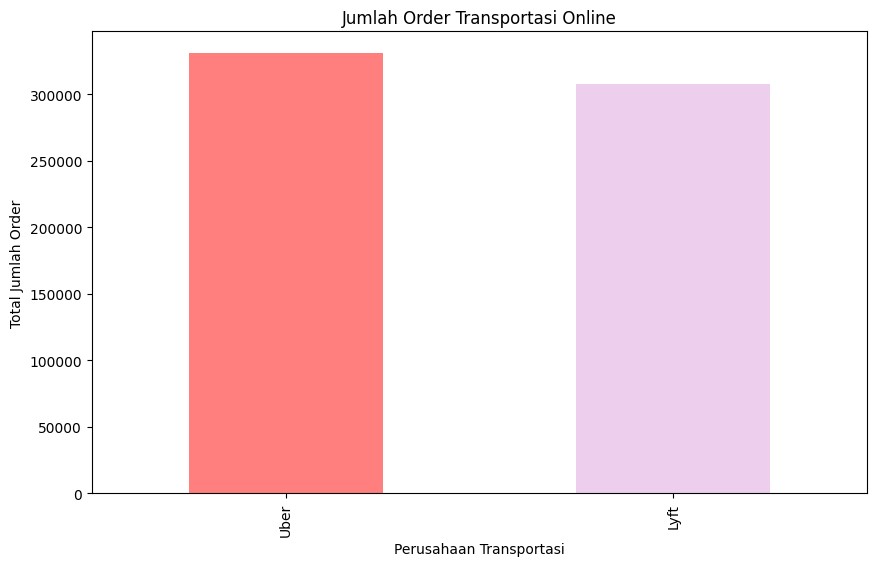

In [229]:
#Memvisualisasikan kolom ride_name dalam bentuk bar charts
df_ridename.plot(kind='bar', figsize=(10,6), color=['red','plum'], alpha=0.5)

plt.xlabel('Perusahaan Transportasi')
plt.ylabel('Total Jumlah Order')
plt.title('Jumlah Order Transportasi Online')

plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')
plt.show()

**Kesimpulan**
Berdasarkan Visualisasi Bar Chart di atas, bisa dilihat bahwa Uber memiliki total jumlah orderan yang lebih banyak dibanding dengan Lyft

###Data Exploration untuk Tipe Transportasi

In [230]:
## Melihat tipe atau jenis transportasi yang ditawarkan oleh Uber
df_ubertype = pd.DataFrame(df_group2[(df_group2['ride_name']=='Uber')].groupby(['type'])['type'].count())
df_ubertype

,type
type,
Black,55095
Black SUV,55096
UberPool,55091
UberX,55094
UberXL,55096
WAV,55096


In [231]:
## Melihat tipe atau jenis transportasi yang ditawarkan oleh Lyft
df_ubertype = pd.DataFrame(df_group2[(df_group2['ride_name']=='Lyft')].groupby(['type'])['type'].count())
df_ubertype

,type
type,
Lux,51235
Lux Black,51235
Lux Black XL,51235
Lyft,51235
Lyft XL,51235
Shared,51233


In [232]:
#Mengubah tipe data menjadi numeric
df_numtype = pd.DataFrame(df_group2.groupby(["ride_name"])["type"].value_counts())
df_numtype

type
ride_name type               
Lyft      Lux           51235
          Lux Black     51235
          Lux Black XL  51235
          Lyft          51235
          Lyft XL       51235
          Shared        51233
Uber      Black SUV     55096
          UberXL        55096
          WAV           55096
          Black         55095
          UberX         55094
          UberPool      55091

####Visualisasi untuk Tipe Transportasi

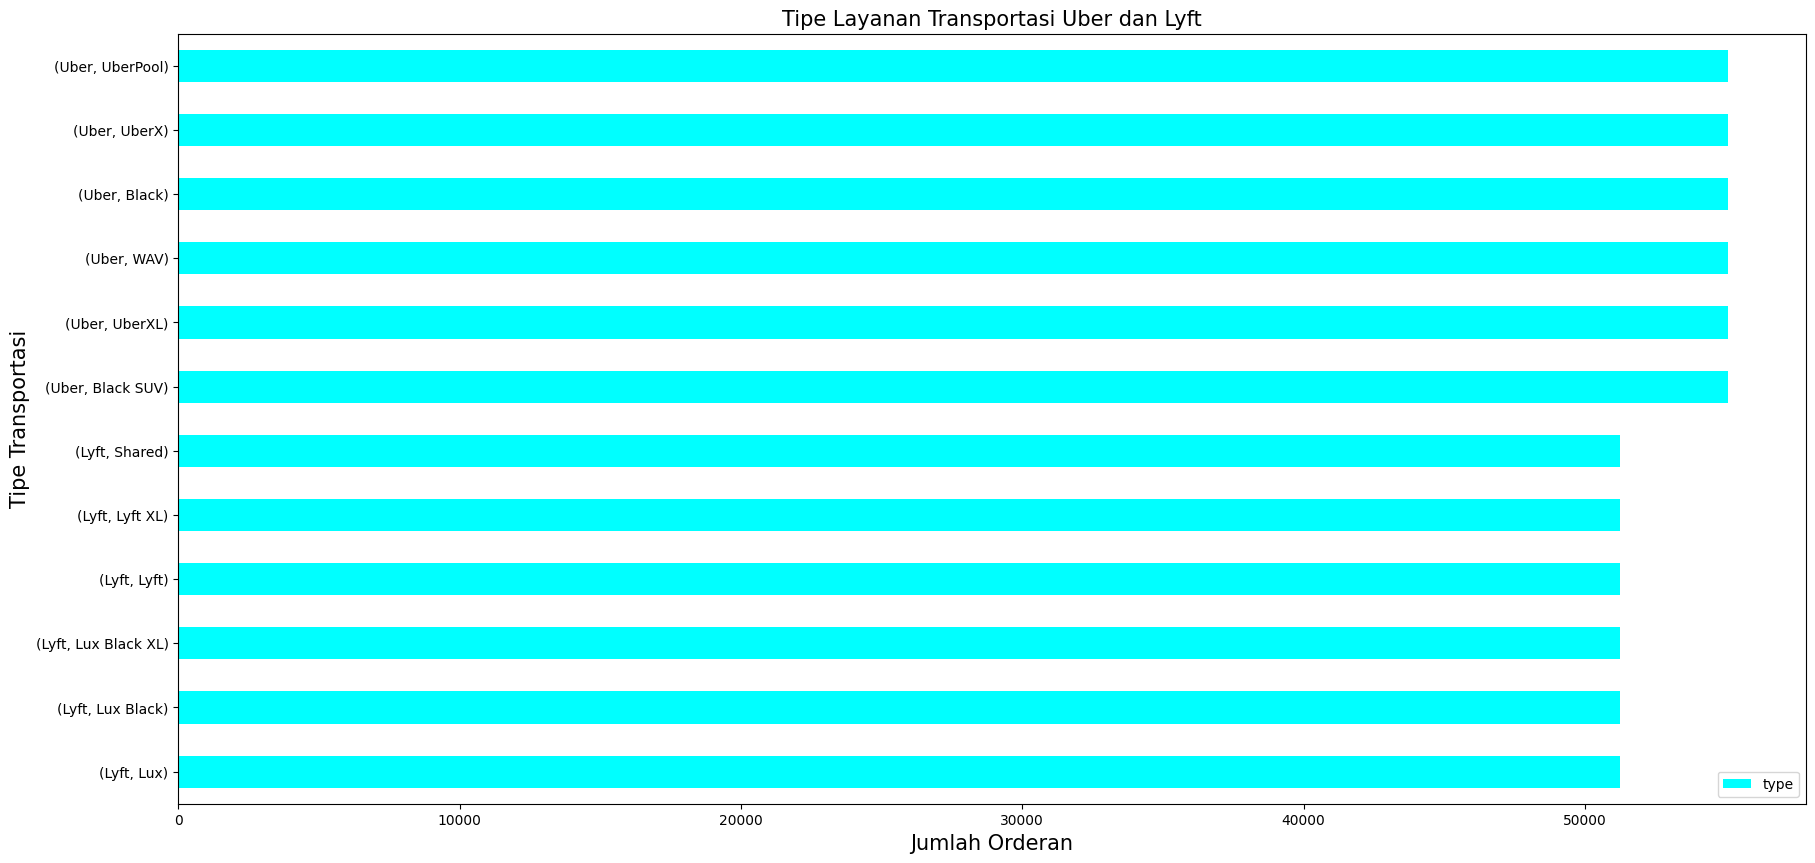

In [233]:
## Memvisualiasikan kolom 'type' berdasarkan total jenis transportasi
df_numtype.plot(kind="barh",
                figsize=(21,10),
                color='aqua')

plt.title("Tipe Layanan Transportasi Uber dan Lyft", fontsize=15)
plt.ylabel("Tipe Transportasi", fontsize=15)
plt.xlabel("Jumlah Orderan", fontsize=15)

plt.show()

**Kesimpulan:**
Berdasarkan visualisasi diatas, dapat dilihat bahwa semua tipe/jenis transportasi uber memiliki jumlah orderan yang lebih banyak dipesan daripada Lyft dan keduanya memiliki distribusi yang signifikan.

###Data Exploration untuk Month

In [234]:
#Membuat variabel months untuk menyimpan data month untuk divisualisasikan dalam pie charts
month1 = df_group2['month'].value_counts()
months = pd.DataFrame(data=month1.index, columns=["month"])
months['values'] = month1.values
months

,month,values
0,12,374205
1,11,263771


####Visualisasi untuk Month

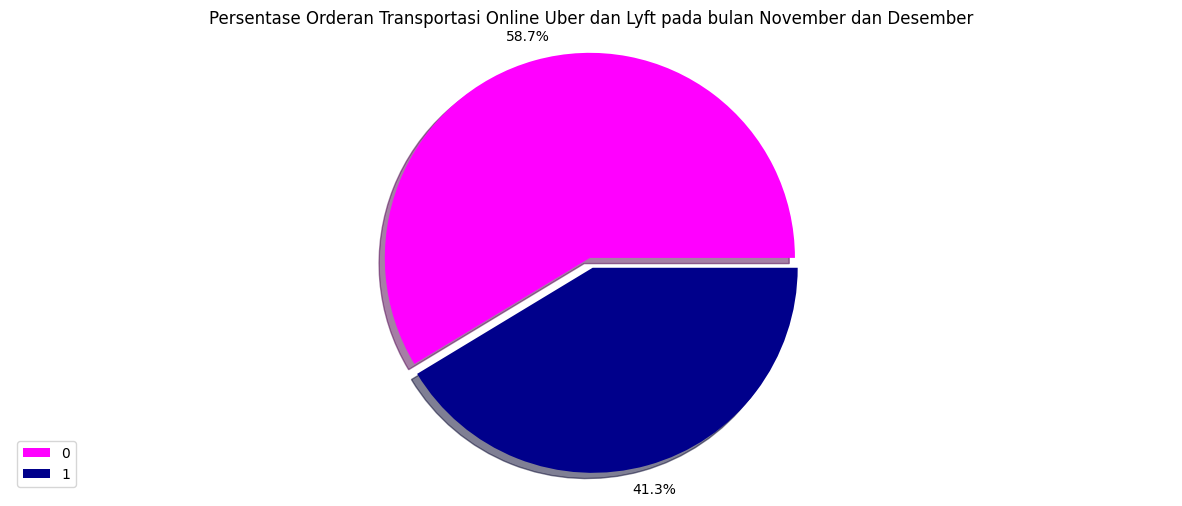

In [235]:
#Memvisualisasikan kolom month dalam bentuk pie chart
explode_list=[0.05,0]
color_list=['magenta','darkblue']
month1.plot(
        kind="pie",
        figsize=(15,6),
        shadow=True,
        autopct="%1.1f%%",
        labels=None,
        colors=color_list,
        explode=explode_list,
        pctdistance=1.12)

plt.title('Persentase Orderan Transportasi Online Uber dan Lyft pada bulan November dan Desember')
plt.ylabel('')
plt.axis('equal')
plt.legend(months.index, loc='lower left')
plt.show()


**Kesimpulan:**
Berdasarkan Pie Chart di atas, dapat dilihat bahwa Uber memiliki lebih banyak orderan(58,7%) dibanding Lyft(41,3%) untuk periode bulan November dan Desember.

###Data Exploration untuk Cuaca

In [236]:
#Melihat unique values pada kolom Weather
df_group2['weather'].unique()

array([' Mostly Cloudy ', ' Rain ', ' Clear ', ' Partly Cloudy ',
       ' Overcast ', ' Light Rain ', ' Foggy ', ' Possible Drizzle ',
       ' Drizzle '], dtype=object)

In [237]:
#Membuat dataframe baru yang berisi jumlah orderan berdasarkan cuaca
df_weather=pd.DataFrame(df_group2.groupby(['weather'])['weather'].value_counts())
df_weather=df_weather.rename(columns={'weather':'value'})
df_weather.reset_index(drop=True,
                      inplace=True)
df_weather['weather']=[
                    'clear',
                    'Drizzle',
                    'Foggy',
                    'Light Rain',
                    'Mostly Cloudy',
                    'Overcast',
                    'Partly Cloudy',
                    'Possible Drizzle',
                    'Rain']
df_weather=df_weather.set_index('weather')
df_weather

,value
weather,
clear,80256
Drizzle,6725
Foggy,8292
Light Rain,50488
Mostly Cloudy,134603
Overcast,201429
Partly Cloudy,117226
Possible Drizzle,17176
Rain,21781


####Visualisasi untuk Cuaca

In [238]:
#Menyiapkan dataframe baru untuk membuat visualisasi dengan plotting bar chart
df_weatherprice=pd.DataFrame(df_group2.groupby(['weather','ride_name']).max()['price'].sort_values())
df_weatherprice=df_weatherprice.rename(columns={'ride_name':'value'})
df_weatherprice

,,price
weather,ride_name,
Foggy,Uber,50.5
Drizzle,Uber,58.5
Light Rain,Uber,59.5
Foggy,Lyft,62.5
Rain,Uber,64.0
Possible Drizzle,Uber,64.5
Clear,Uber,68.5
Possible Drizzle,Lyft,75.0
Drizzle,Lyft,80.0


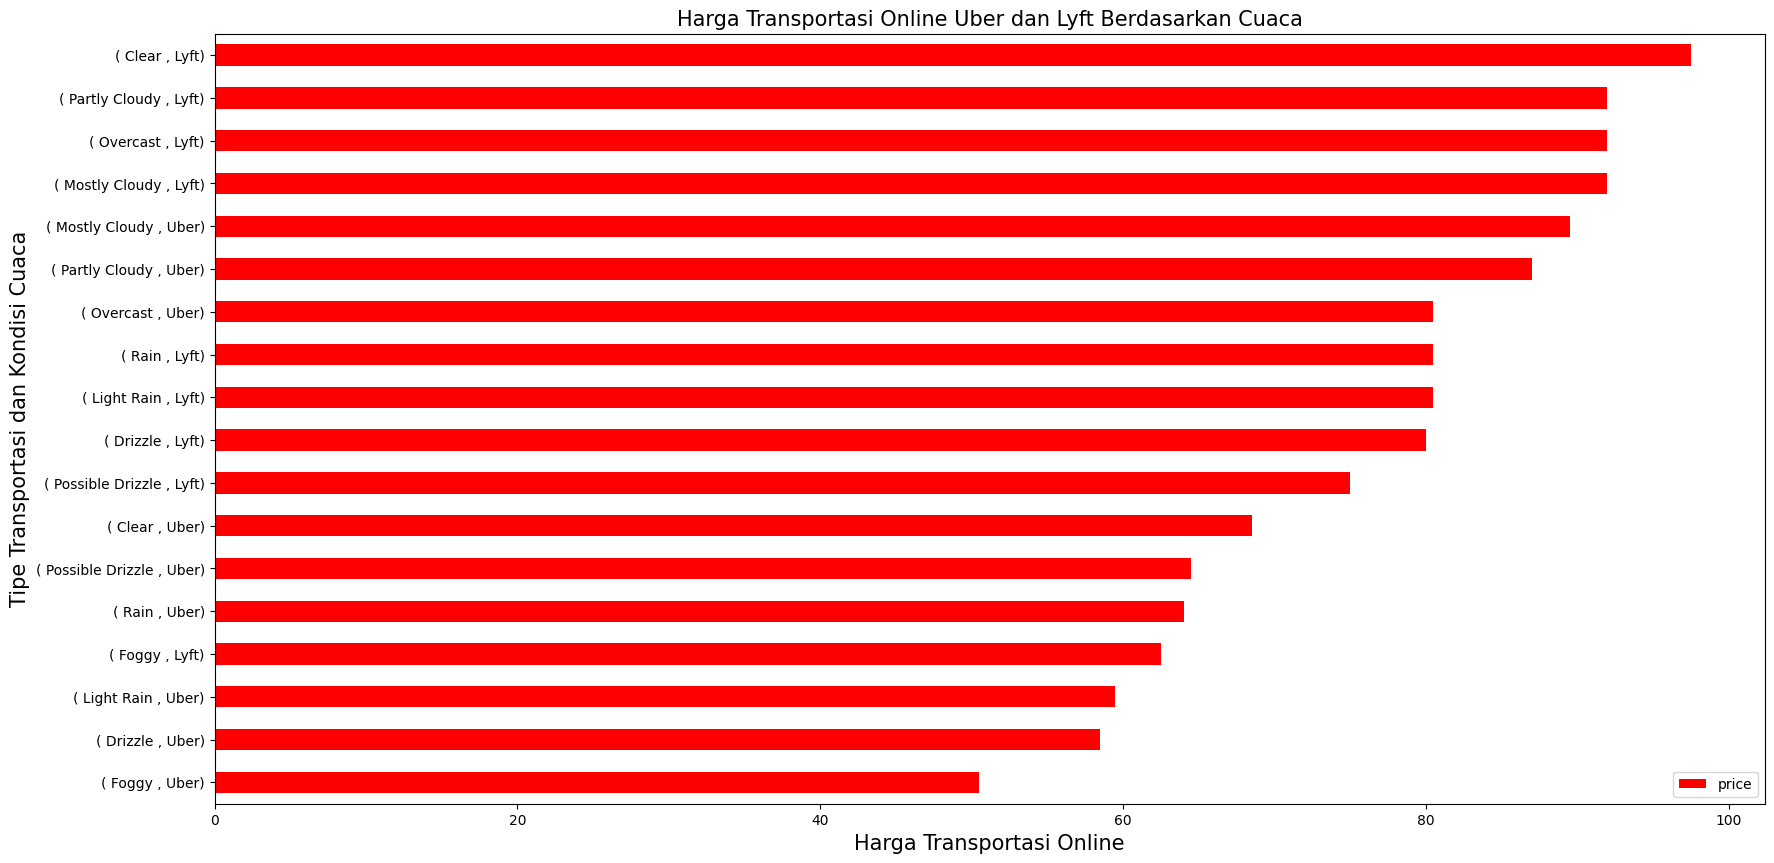

In [239]:
#Memvisualisasikan kolom weather dengan price dalam bar
df_weatherprice.plot(
                kind="barh",
                figsize=(20,10),
                color='red')

plt.title("Harga Transportasi Online Uber dan Lyft Berdasarkan Cuaca", fontsize=15)
plt.ylabel("Tipe Transportasi dan Kondisi Cuaca", fontsize=15)
plt.xlabel("Harga Transportasi Online", fontsize=15)
plt.show()

**Kesimpulan:**
Berdasarkan Bar chart di atas, bisa diketahui bahwa Harga yang ditawarkan Uber kepada customer tetap lebih murah dibanding Lyft pada semua kondisi cuaca

###Data Exploration untuk Route

In [240]:
#Menampilka data rute perjalanan sebanyak 20 rute
df_route = df_group2['route'].value_counts()
df_route2 = df_route[0:20].sort_values()
df_route2

Boston University to Financial District    8940
Financial District to Boston University    8940
North Station to Fenway                    8970
Fenway to North Station                    8970
Theatre District to South Station          8994
South Station to Theatre District          8994
West End to Boston University              9156
Boston University to West End              9162
Theatre District to Boston University      9173
Boston University to Theatre District      9174
North End to Beacon Hill                   9240
Beacon Hill to North End                   9240
Financial District to Haymarket Square     9329
Haymarket Square to Financial District     9330
Fenway to West End                         9360
West End to Fenway                         9360
North End to Back Bay                      9414
Back Bay to North End                      9414
South Station to Financial District        9534
Financial District to South Station        9534
Name: route, dtype: int64

####Visualisasi untuk Route

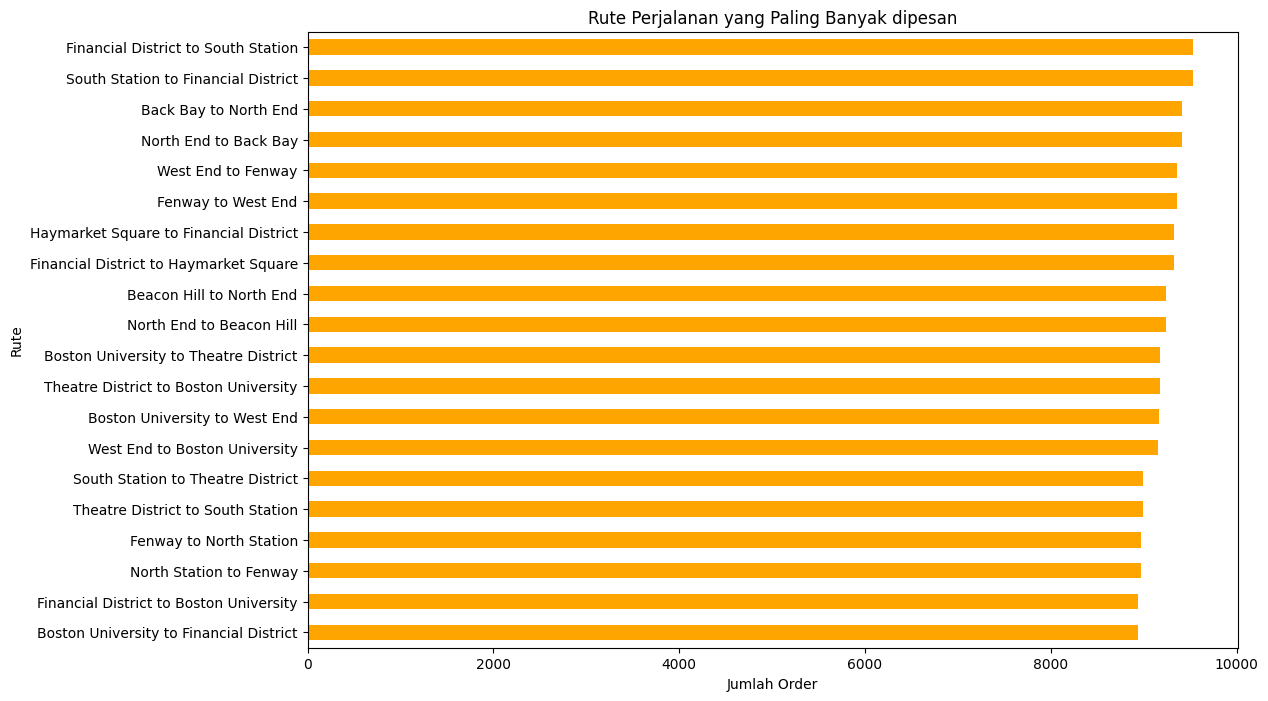

In [241]:
#Memvisualisasikan rute dalam horizontal bar charts
df_route2.plot(kind='barh',
               figsize=(12,8),
               color='orange')

plt.xlabel('Jumlah Order')
plt.ylabel('Rute')
plt.title('Rute Perjalanan yang Paling Banyak dipesan')
plt.show()

**Kesimpulan:**
Rute yang paling banyak diorder adalah rute Financial District ke South Station, sedangkan rute yang paling sedikit mendapat orderan adalah rute Boston University ke Financial District

###Correlation Matrix

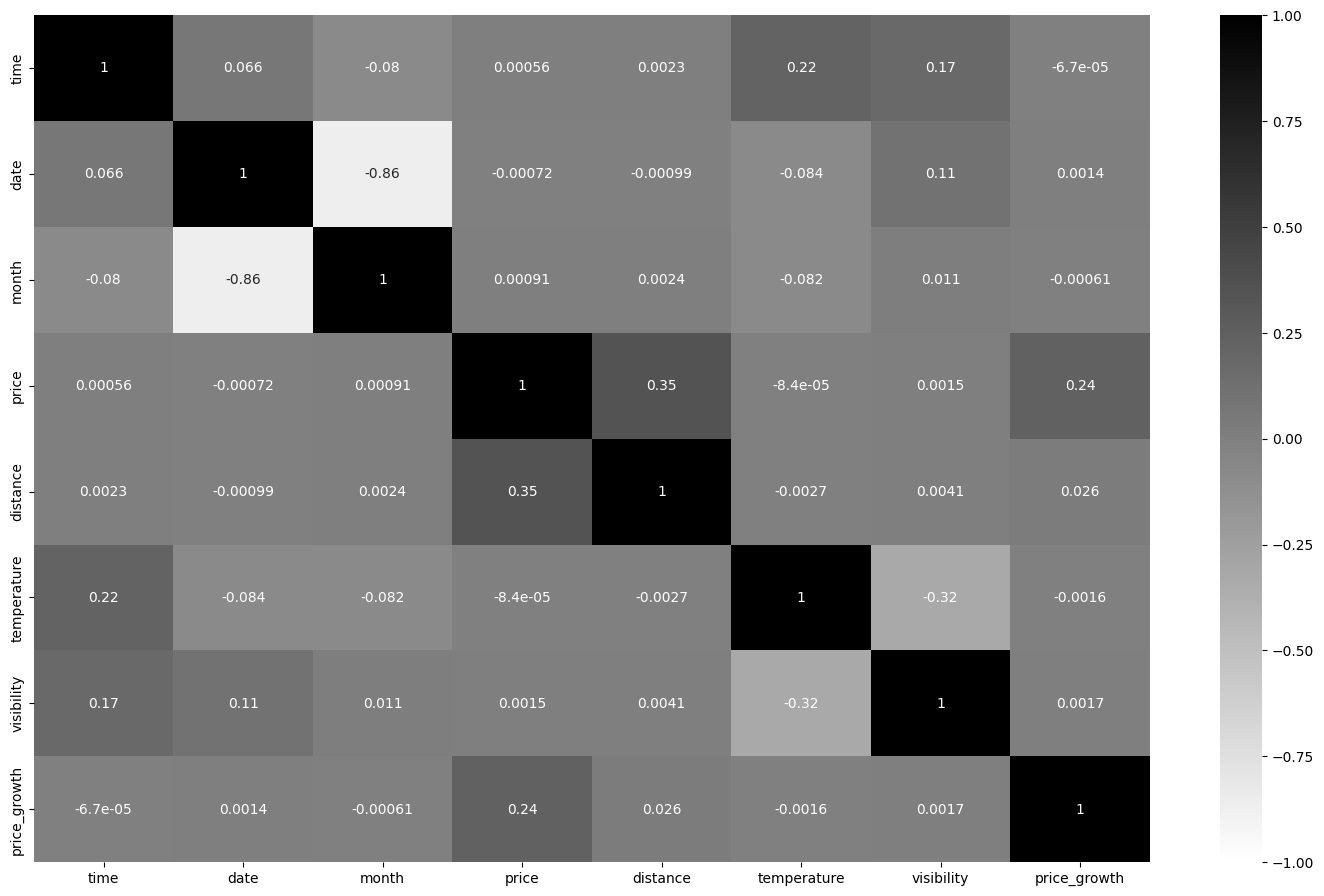

In [242]:
#Melihat korelasi antardata menggunakan heatmap
plt.figure(figsize=(18, 11))
sns.heatmap(df_group2.corr(), vmin=-1, vmax=1, annot=True, cmap="gray_r")

plt.show()

**Kesimpulan:**
Berdasarkan Correlation Matrix didapatkan bahwa atribut date dan temperature memiliki korelasi negatif dengan harga, sehingga 2 atribut tersebut akan dihapus dari variable pembanding harga.

In [243]:
#Menghapus atribut date, temperature, start, dan end
df_group3=df_group2.drop(['date','temperature', 'start', 'end'], axis=1)
df_group3.head(10)

,ride_name,type,time,month,price,distance,weather,visibility,price_growth,route
0,Lyft,Shared,9,12,5.0,0.44,Mostly Cloudy,10.000,1.0,Haymarket Square to North Station
1,Lyft,Lux,2,11,11.0,0.44,Rain,4.786,1.0,Haymarket Square to North Station
2,Lyft,Lyft,1,11,7.0,0.44,Clear,10.000,1.0,Haymarket Square to North Station
3,Lyft,Lux Black XL,4,11,26.0,0.44,Clear,10.000,1.0,Haymarket Square to North Station
4,Lyft,Lyft XL,3,11,9.0,0.44,Partly Cloudy,10.000,1.0,Haymarket Square to North Station
5,Lyft,Lux Black,18,12,16.5,0.44,Overcast,8.325,1.0,Haymarket Square to North Station
6,Lyft,Lyft XL,5,11,10.5,1.08,Overcast,4.675,1.0,Back Bay to Northeastern University
7,Lyft,Lux Black,19,12,16.5,1.08,Light Rain,3.052,1.0,Back Bay to Northeastern University
8,Lyft,Shared,6,12,3.0,1.08,Foggy,1.413,1.0,Back Bay to Northeastern University
9,Lyft,Lux Black XL,10,11,27.5,1.08,Light Rain,2.686,1.0,Back Bay to Northeastern University


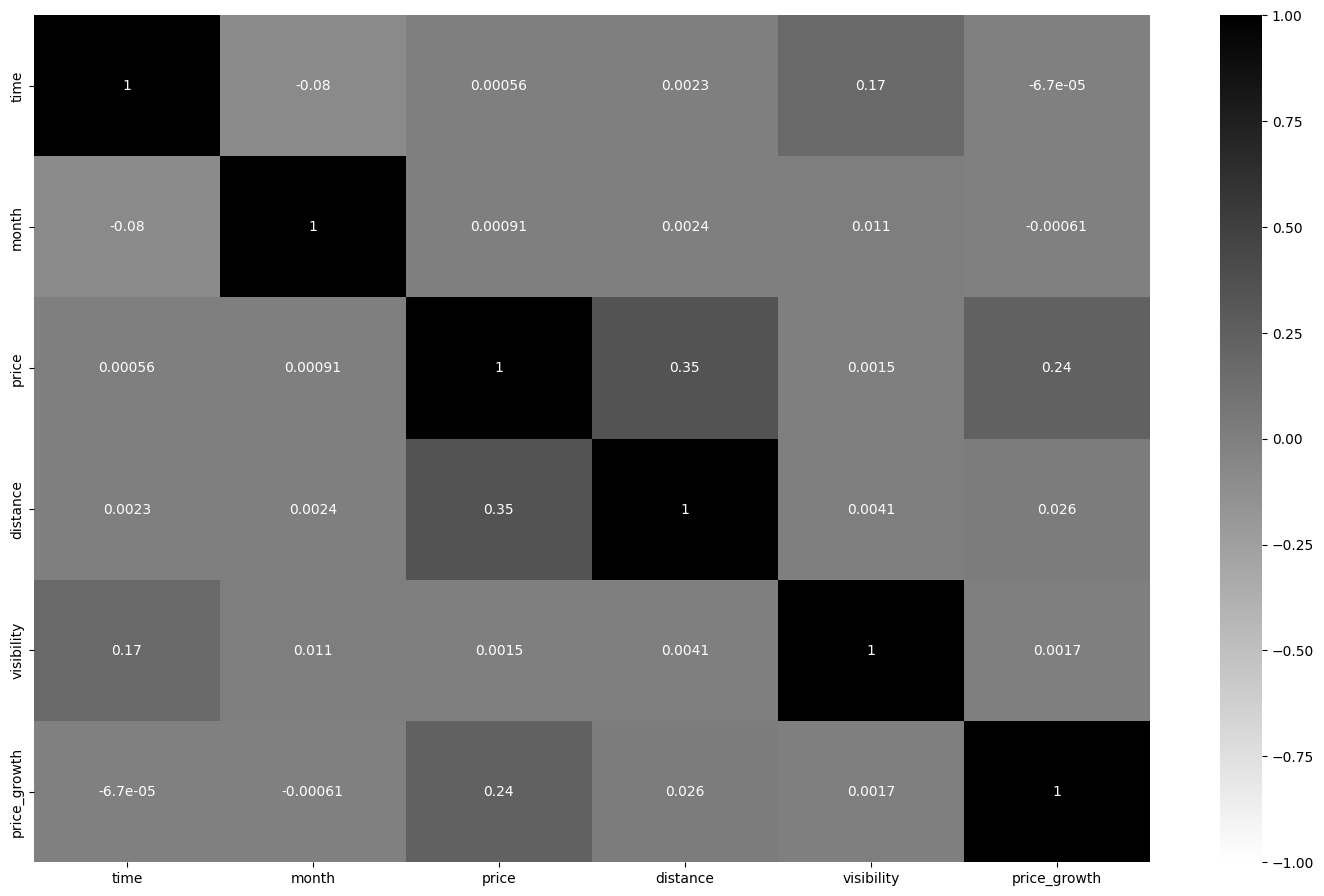

In [244]:
#Mengecek kembali Correlation Matrix nya
plt.figure(figsize=(18, 11))
sns.heatmap(df_group3.corr(), vmin=-1, vmax=1, annot=True, cmap="gray_r")

plt.show()

##F. Data Preprocessing

###Encoding

In [245]:
# Melakukan encoding untuk beberapa kolom yang ingin di encode
columns_to_encode = ["ride_name", "type", "weather", "route"]
for col in columns_to_encode:
    le = LabelEncoder()
    df_group3[col] = le.fit_transform(df_group3[col])

#Menampilkan 10 data teratas
df_group3.head(10)

,ride_name,type,time,month,price,distance,weather,visibility,price_growth,route
0,0,7,9,12,5.0,0.44,4,10.000,1.0,33
1,0,2,2,11,11.0,0.44,8,4.786,1.0,33
2,0,5,1,11,7.0,0.44,0,10.000,1.0,33
3,0,4,4,11,26.0,0.44,0,10.000,1.0,33
4,0,6,3,11,9.0,0.44,6,10.000,1.0,33
5,0,3,18,12,16.5,0.44,5,8.325,1.0,33
6,0,6,5,11,10.5,1.08,5,4.675,1.0,4
7,0,3,19,12,16.5,1.08,3,3.052,1.0,4
8,0,7,6,12,3.0,1.08,2,1.413,1.0,4
9,0,4,10,11,27.5,1.08,3,2.686,1.0,4


In [246]:
#Memisahkan price dan x_trans menampung dataframe yang kolom pricenya telah dihapus
x_trans = df_group3.drop(["price"], axis=1)
#Melihat Jumlah Baris dan Kolom pada x_trans
print(x_trans.shape)

(637976, 9)


In [247]:
#Membuat variabel y yang menampung hanya kolom price yang telah dipisahkan tadi
y = df_group3['price']
#Melihat Baris dan Kolom dalam variabel y
print(y.shape)

(637976,)


###Sequential Feature Selection (SFS)

In [248]:
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          verbose=2,
           cv=0)
sfs = sfs.fit(x_trans, y)

selected_feature_names = sfs.k_feature_names_
print(selected_feature_names)


[2023-11-19 09:49:18] Features: 1/7 -- score: 0.3441509137087563
[2023-11-19 09:49:19] Features: 2/7 -- score: 0.4634432048911029
[2023-11-19 09:49:20] Features: 3/7 -- score: 0.5001678332282558
[2023-11-19 09:49:21] Features: 4/7 -- score: 0.5140218526120223
[2023-11-19 09:49:21] Features: 5/7 -- score: 0.5141732171606457
[2023-11-19 09:49:22] Features: 6/7 -- score: 0.5141737249061435

('ride_name', 'type', 'month', 'distance', 'weather', 'price_growth', 'route')



[2023-11-19 09:49:23] Features: 7/7 -- score: 0.5141737914039584

In [249]:
#Membuat variabel x_transform untuk menampung hasil data yang menghapus kolom price dan rate
x_trans = df_group3.drop(['price'], axis=1)

#Menggunakan SelectKBest dengan skor f_regression untuk memilih atribut terbaik
best_features = SelectKBest(score_func=f_regression, k=7)
best_features.fit(x_trans, y)

#Mendapatkan nilai skor untuk setiap atribut
feature_scores = best_features.scores_

#Mendapatkan nama atribut
feature_names = x_trans.columns

#Membuat DataFrame untuk atribut dan skornya
feature_scores_df = pd.DataFrame({'Atribut': feature_names, 'Nilai': feature_scores})

#Mengurutkan DataFrame berdasarkan skor tertinggi
sorted_features = feature_scores_df.nlargest(7, 'Nilai')

print(sorted_features)

        Atribut          Nilai
1          type  334771.122826
4      distance   86228.749811
7  price_growth   39151.469570
0     ride_name    4466.959446
8         route     582.615651
6    visibility       1.428760
5       weather       0.988454


**Kesimpulan:**
Dari hasil di atas, bisa dilihat bahwa atribut yang memiliki nilai terendah adalah visibiliy dan weather, maka 2 atribut tersebut akan dihapus.

In [250]:
#Dibuat variabel x_fin untuk memuat data yang tidak memuat kedua atribut tadi
x_fin = df_group3[['ride_name',
                    'type',
                    'route',
                    'distance',
                    'price_growth']]
x_fin

,ride_name,type,route,distance,price_growth
0,0,7,33,0.44,1.0
1,0,2,33,0.44,1.0
2,0,5,33,0.44,1.0
3,0,4,33,0.44,1.0
4,0,6,33,0.44,1.0
...,...,...,...,...,...
693065,1,11,69,1.00,1.0
693066,1,10,69,1.00,1.0
693067,1,9,69,1.00,1.0
693069,1,1,69,1.00,1.0


##G. Modelling

###Background

Dalam proyek kali ini, kami akan menggunakan metode **Linear Regression** sebagai model dasar, dan akan kami bandingkan dengan model **Decision Tree**. Linear Regression dikenal sebagai sebuah metode regresi yang simpel dan sudah banyak digunakan dalam statistik. Keunggulan utama **Linear Regression** ini terletak pada kemampuannya untuk memberikan hasil yang mudah diinterpretasikan dan mudah dipahami tentang bagaimana variabel independen berhubungan dengan variabel yang dependen. Hal ini sangat berguna ketika ingin mengevaluasi sejauh mana hubungan linier antara variabel yang diprediksi dan variabel respons.

Linear Regression juga memiliki keterbatasan, terutama dalam menangani hubungan yang rumit atau non-linier antar variabel. Oleh karena itu, kami akan membandingkannya dengan Decision Tree, yang merupakan model non-linier dan mampu mengatasi hubungan yang lebih kompleks antar variabel. Decision Tree merupakan pilihan yang tepat ketika dihadapkan dengan data yang tidak mematuhi asumsi linieritas.

Dengan membandingkan Linear Regression dan Decision Tree, kami akan mengevaluasi sejauh mana kinerja kedua model ini. Dengan demikian, pemilihan metode pengujian ini akan memberikan wawasan yang lebih mendalam dalam memahami karakteristik data yang sedang dianalisis.

###Perancangan Model

In [251]:
X_train, X_test, Y_train, Y_test = train_test_split(x_fin, y, test_size=0.30, random_state=450)

####Linear Regression

In [252]:
model_lr = LinearRegression()

#Melatih model dengan data train
model_lr1 = model_lr.fit(X_train, Y_train)

#Menampilkan nilai intercept
intercept = model_lr1.intercept_
print(f'Nilai Intercept: {intercept}')

Nilai Intercept: -2.9480986940076477


In [253]:
#Menampilkan nilai koefisien
coefficients = model_lr1.coef_
print('Coefficients values:\n', coefficients)

Coefficients values:
 [ 2.31529055e+00 -1.62349279e+00  5.29483302e-03  2.79953523e+00
  2.06581695e+01]


In [254]:
#Melakukan prediksi untuk data train
pred_lr = model_lr1.predict(X_test)

#Menghitung R-squared (R2) pada data train dan data test
r2train_lr = r2_score(Y_train, model_lr1.predict(X_train))
r2test_lr = r2_score(Y_test, pred_lr)

print(f'R-Squared Linear Regression train: {r2train_lr:.4f}')
print(f'R-Squared Linear Regression test: {r2test_lr:.4f}')

R-Squared Linear Regression train: 0.5151
R-Squared Linear Regression test: 0.5121


In [255]:
#Menghitung Root Mean Square Error(RMSE)
lr_mse = mean_squared_error(pred_lr, Y_test)
lr_rmse = np.sqrt(lr_mse)
print('RMSE Linear Regression: %.4f' % lr_rmse)

RMSE Linear Regression: 6.5050


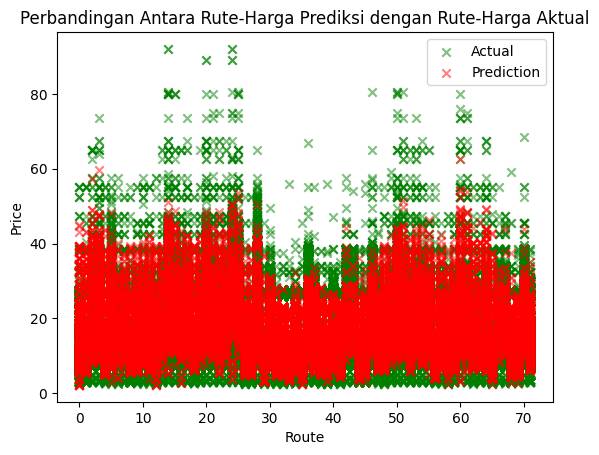

In [256]:
# Memvisualisasikan perbandingan route terhadap price
x_axis = X_test.route
plt.scatter(x_axis,
            Y_test,
            c='g',
            alpha=0.5,
            marker='x',
            label='Actual')
plt.scatter(x_axis,
            pred_lr,
            c='r',
            alpha=0.5,
            marker='x',
            label='Prediction')

plt.xlabel('Route')
plt.ylabel('Price')
plt.title("Perbandingan Antara Rute-Harga Prediksi dengan Rute-Harga Aktual")
plt.legend(loc='upper right')
plt.show()

####Decision Tree

In [257]:
model_dt = DecisionTreeRegressor()

#Melatih model dengan data train
model_dt1 = model_dt.fit(X_train, Y_train)

#Melakukan prediksi dengan data train
pred_dt = model_dt1.predict(X_test)

#Menghitung R-squared (R2) pada data train dan data test
r2train_dt = r2_score(Y_train, model_dt1.predict(X_train))
r2test_dt = r2_score(Y_test, pred_dt)

print(f'R-squared Decision Tree Regression train: {r2train_dt:.4f}')
print(f'R-squared Decision Tree Regression test: {r2test_dt:.4f}')

R-squared Decision Tree Regression train: 0.9735
R-squared Decision Tree Regression test: 0.9676


In [258]:
#Menghitung Root Mean Square Error(RMSE)
dt_mse = mean_squared_error(pred_dt, Y_test)
dt_rmse = np.sqrt(dt_mse)
print('RMSE Decision Tree: %.4f' % dt_rmse)

RMSE Decision Tree: 1.6760


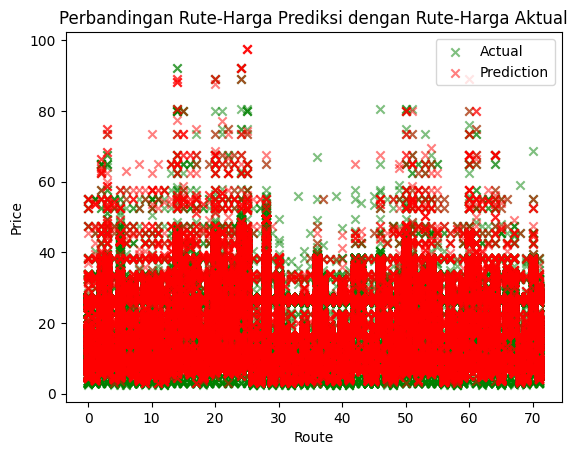

In [259]:
# Memvisualisasikan perbandingan route terhadap price
x_axis = X_test.route
plt.scatter(x_axis,
            Y_test,
            c='g',
            alpha=0.5,
            marker='x',
            label='Actual')
plt.scatter(x_axis,
            pred_dt,
            c='r',
            alpha=0.5,
            marker='x',
            label='Prediction')
plt.xlabel('Route')
plt.ylabel('Price')
plt.title("Perbandingan Rute-Harga Prediksi dengan Rute-Harga Aktual")
plt.legend(loc='upper right')

plt.show()

##H. Inferencing

Inferencing kali ini bertujuan untuk melakukan testing pada kedua model apakah model tersebut sudah bisa berjalan atau tidak

In [263]:
#Menginsall dan mengimport joblib
!pip install joblib
import joblib

#Memuat kembali model Linear Regression yang telah dilatih dan disimpan sebelumnya
lr_cv_model = joblib.load('/content/drive/MyDrive/Dataset_fp1/lr-trained-model.pkl')

#Memuat kembali model Decision Tree yang telah dilatih dan disimpan sebelumnya
dt_cv_model = joblib.load('/content/drive/MyDrive/Dataset_fp1/dt-trained-model.pkl')

In [264]:
#Data baru untuk Inferencing
X_new = np.array([
    [0, 2.0, 24, 3.35, 1.75],     # Contoh data pertama
    [1, 3.5, 22, 1.93, 2.0],     # Contoh data kedua
    [1, 5.1, 43, 4.65, 1.5],     # Contoh data ketiga
    [1, 9.0, 33, 3.77, 1.0],     # Contoh data keempat
    [0, 7.2, 29, 2.86, 2.25]      # Contoh data kelima
    ])

#Melakukan prediksi dengan model Linear Regression
lr_predictions = lr_cv_model.predict(X_new)

#Melakukan prediksi dengan model Decision Tree
dt_predictions = dt_cv_model.predict(X_new)

#Menampilkan hasil prediksi
print("Hasil Prediksi Linear Regression:")
for i, pred in enumerate(lr_predictions):
    print(f"Data ke-{i+1}: {pred:.2f}")

print("\nHasil Prediksi Decision Tree:")
for i, pred in enumerate(dt_predictions):
    print(f"Data ke-{i+1}: {pred:.2f}")

Hasil Prediksi Linear Regression:
Data ke-1: 39.46
Data ke-2: 40.52
Data ke-3: 35.32
Data ke-4: 16.14
Data ke-5: 40.00

Hasil Prediksi Decision Tree:
Data ke-1: 32.50
Data ke-2: 28.12
Data ke-3: 19.50
Data ke-4: 11.80
Data ke-5: 7.00


**Kesimpulan dari Inferencing**
1. Terdapat perbedaan yang cukup signifikan antara hasil prediksi dari model Linear Regression dengan model Decision Tree. Hal ini menunjukkan bahwa kedua model mungkin memiliki cara yang berbeda dalam mempelajari dan memodelkan hubungan antara fitur dan nilai target.

2. Model Linear Regression cenderung memberikan nilai prediksi yang lebih tinggi dibandingkan dengan model Decision Tree untuk kelima data baru yang diberikan.

3. Model Decision Tree memberikan nilai prediksi yang lebih rendah untuk kelima data baru tersebut dengan selisih nilai yang cukup signifikan dibandingkan dengan prediksi yang diberikan oleh model Linear Regression.

##I. Kesimpulan

In [265]:
print(f'R-squared Linear Regression test: {r2test_lr:.4f}')
print('RMSE Linear Regression: %.4f\n' % lr_rmse)
print(f'R-squared Decision Tree Regression test: {r2test_dt:.4f}')
print('RMSE Decision Tree: %.4f' % dt_rmse)

R-squared Linear Regression test: 0.5121
RMSE Linear Regression: 6.5050

R-squared Decision Tree Regression test: 0.9676
RMSE Decision Tree: 1.6760


* Berdasarkan Visualisasi dan Eksplorasi data di atas, ada beberapa faktor yang memengaruhi harga pada transportasi online yaitu type, distance, weather, route, price_growth, dan time
* Decision Tree merupakan model yang lebih baik untuk digunakan karena nilai R-squared pada Decision Tree lebih optimal dibandingkan dengan nilai R-squared Linear Regression.
* Nilai RMSE yang diperoleh dari model Decision Tree juga memiliki nilai yang lebih stabil dibandingkan dengan nilai RMSE pada model Linear Regression yang mempunyai nilai yang tinggi.